In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

patient_icd_path = "../../../PATIENT_ICD_BINARY.CSV"

In [2]:
picd = pd.read_csv(patient_icd_path, sep=" ")

In [3]:
picd

,SUBJECT_ID,0030,0031,0038,0039,0041,0048,0049,0051,00581,...,V8801,V8811,V8812,V8821,V9010,V902,V9039,V9081,V9089,V9103
0,109,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,112,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,113,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,114,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,115,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46515,97164,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46516,97484,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46517,97488,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46518,97492,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
pdata = picd.drop("SUBJECT_ID", axis=1).T.to_numpy()
pdata

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [65]:
sorted_idx = []
last_idx = 0
seen = set([11111])
# unwanted = [1962, 2019, 2098, 2109, 2957, 946, 824, 2536, 3028, 6519]
unwanted = set([])

for icd_idx in tqdm(range(pdata.shape[0])):
    if icd_idx in unwanted:
        continue
    icd_row = pdata[icd_idx]
    has_icd = set(np.nonzero(icd_row)[0])
    has_icd -= seen
    
    sorted_idx += list(has_icd)
    seen.update(sorted_idx)

100%|██████████| 6984/6984 [00:15<00:00, 449.13it/s]


In [66]:
pdata_sorted = pdata.T[sorted_idx].T
pdata_sorted.shape

(6984, 46516)

In [67]:
pdata_sorted.shape

(6984, 46516)

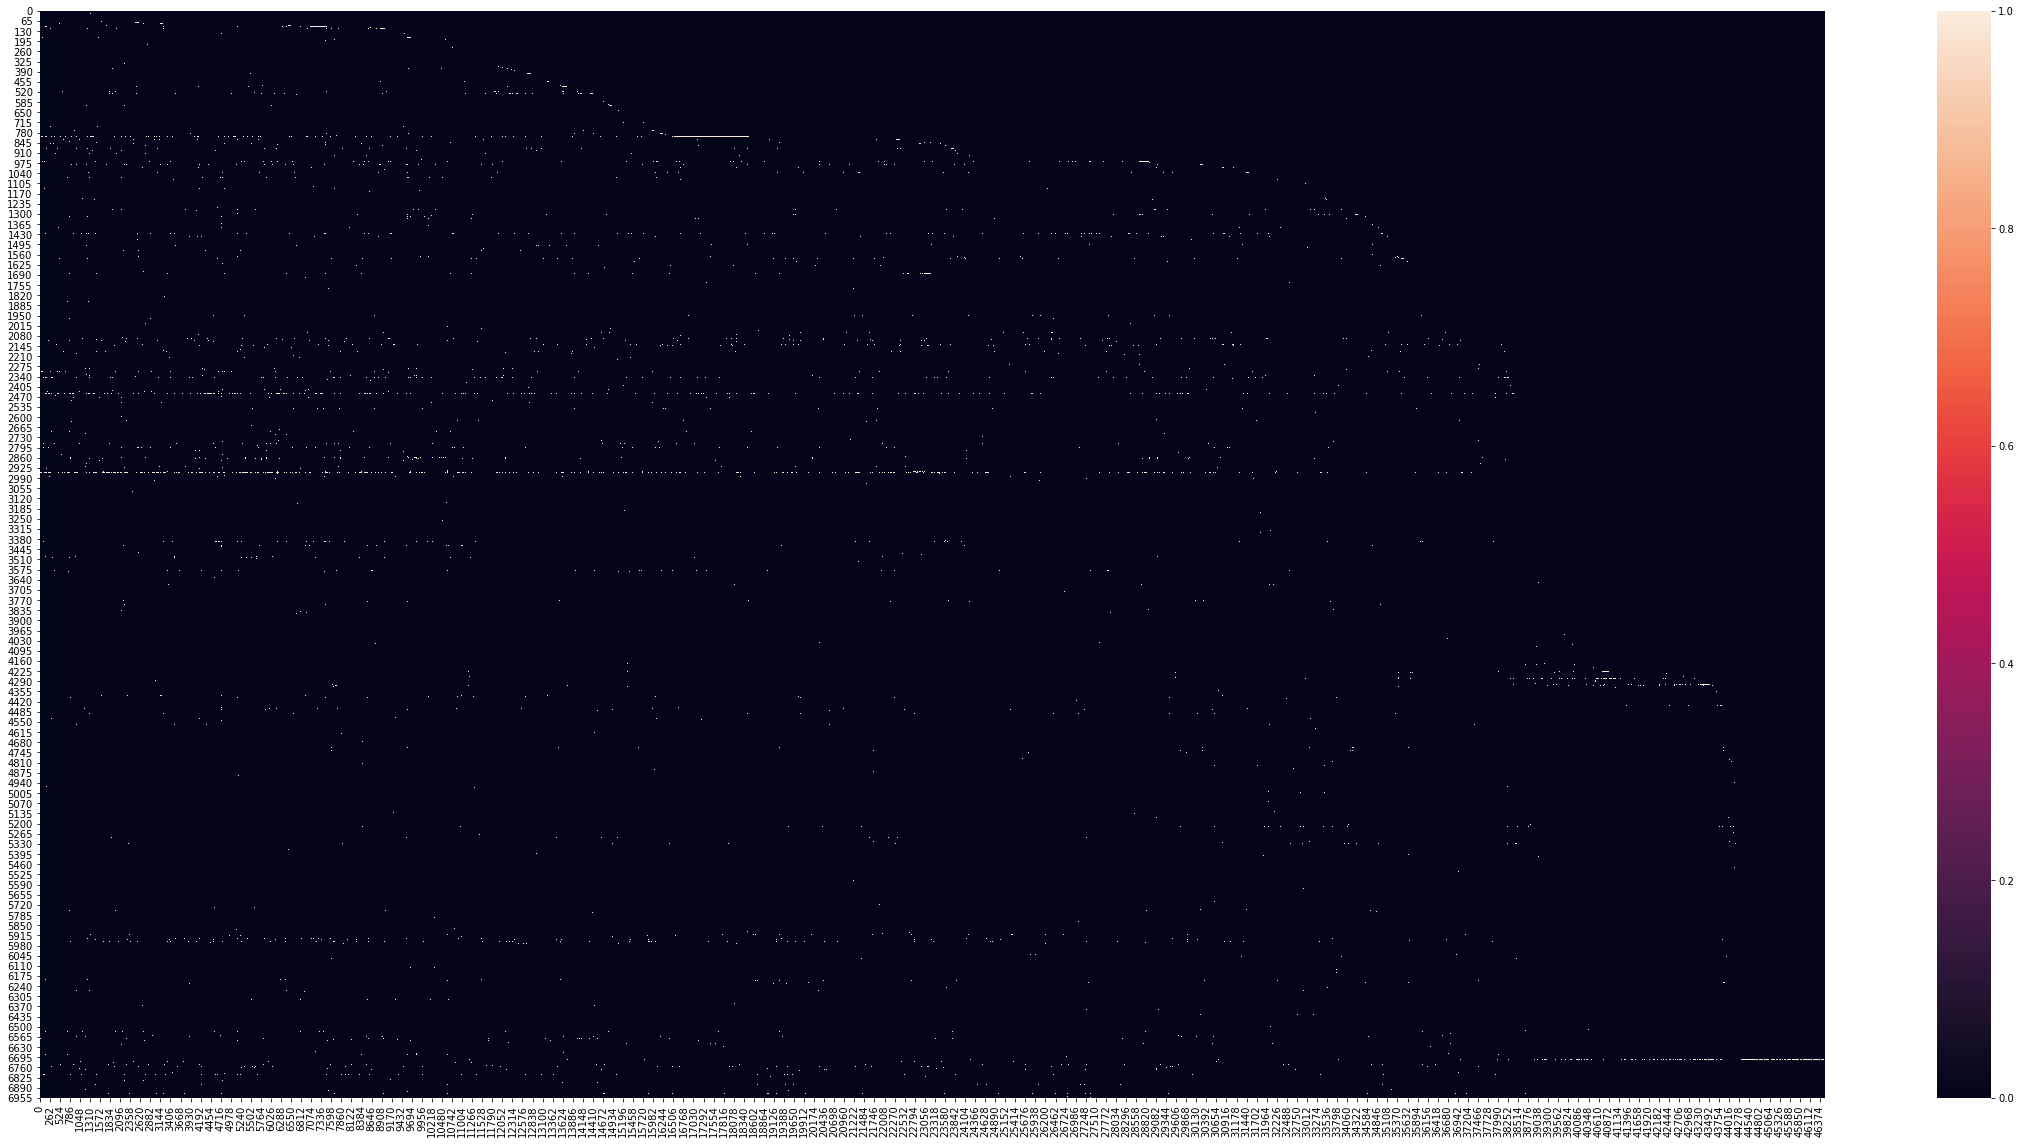

In [68]:
i =0
plt.figure(figsize=(40, 20))
sns.heatmap(pdata_sorted[i:, i:])
plt.savefig("sorted_matrix_map_freq_threshold_{}.png".format("None"))

In [10]:
pca = PCA(n_components = 100).fit(pdata)
print(pca.explained_variance_ratio_)

[0.08924146 0.02514551 0.02461732 0.01721329 0.01273264 0.01109506
 0.00981561 0.00931651 0.00920089 0.00850914 0.0080733  0.00792357
 0.00757332 0.00742323 0.00715517 0.00681219 0.00625406 0.00600097
 0.00584738 0.00566397 0.0055931  0.00535276 0.00517503 0.00513408
 0.00493733 0.00488793 0.0048366  0.00467346 0.00461123 0.00447067
 0.00428244 0.00414972 0.00411123 0.0039785  0.00386797 0.00377368
 0.00371343 0.00365668 0.00361348 0.00349377 0.00345158 0.00330934
 0.00325917 0.00322788 0.0031584  0.00305591 0.00300196 0.00295965
 0.00294453 0.00289367 0.00285803 0.00280744 0.00277489 0.00276528
 0.00271521 0.00269096 0.00268442 0.00261109 0.00256261 0.00250982
 0.00250206 0.00248348 0.00241723 0.00238614 0.00236838 0.00235206
 0.00228359 0.00226127 0.00223756 0.00221427 0.00219775 0.00218218
 0.00216744 0.00214473 0.00213123 0.00209276 0.00207912 0.00207406
 0.00205067 0.00201232 0.00200436 0.00197564 0.00194054 0.00192976
 0.00189484 0.00187684 0.00185415 0.00184918 0.00183512 0.0018

In [18]:
picd.columns[1:]

Index(['0030', '0031', '0038', '0039', '0041', '0048', '0049', '0051', '00581',
       '0059',
       ...
       'V8801', 'V8811', 'V8812', 'V8821', 'V9010', 'V902', 'V9039', 'V9081',
       'V9089', 'V9103'],
      dtype='object', length=6984)

In [14]:
pdata_p = pdata.T
pdata_p.shape
pdata_freq = np.sum(pdata_p, axis=0)
pdata_freq.shape

(6984,)

In [22]:
freqs_zipped = zip(pdata_freq, picd.columns[1:])
freqs_sorted = sorted(freqs_zipped, key=lambda x: x[0], reverse=True)
freqs_sorted

[(17613, '4019'),
 (10775, '41401'),
 (10271, '42731'),
 (9843, '4280'),
 (7687, '5849'),
 (7465, '2724'),
 (7370, '25000'),
 (6719, '51881'),
 (5779, '5990'),
 (5776, 'V053'),
 (5505, 'V290'),
 (5335, '2720'),
 (5272, '53081'),
 (4993, '2859'),
 (4423, '486'),
 (4241, '2851'),
 (4177, '2762'),
 (3819, '2449'),
 (3592, '496'),
 (3566, 'V3000'),
 (3560, '99592'),
 (3433, '0389'),
 (3396, '5070'),
 (3213, 'V5861'),
 (3001, '3051'),
 (2926, '311'),
 (2911, '41071'),
 (2908, '5859'),
 (2836, '40390'),
 (2807, '2875'),
 (2805, '2761'),
 (2787, '412'),
 (2758, 'V3001'),
 (2651, '4240'),
 (2565, '5119'),
 (2551, 'V1582'),
 (2416, '78552'),
 (2336, 'V4581'),
 (2315, '42789'),
 (2311, '4241'),
 (2308, '9971'),
 (2262, 'V4582'),
 (2248, '7742'),
 (2184, '5845'),
 (2099, '2760'),
 (2081, '5180'),
 (2062, '45829'),
 (2016, 'V502'),
 (2015, 'V5867'),
 (1923, '2767'),
 (1916, '4589'),
 (1821, '49390'),
 (1806, '4168'),
 (1781, '5185'),
 (1768, '32723'),
 (1748, '40391'),
 (1723, '78039'),
 (1700, '2

In [64]:
icd_cols = list(picd.columns[1:])
threshold = 7000
unwanted = [icd_cols.index(icd_code) for freq, icd_code in freqs_sorted if freq > threshold]
unwanted = []